In [171]:
# Libraries
import os
import random
from datetime import datetime, date, timedelta
from typing import Dict, List, Tuple, Union
from pathlib import Path
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
class dataops():
    def __init__(self)->None:
        """"""
        pass

    def set_path(self,
                downlods_path:Path[Union, str],
                metafilename:str,
                netcdffilename:str)-> None:
                """"
                Args:
                downloads_path = Set the path where the downloaded meta and netcdf files are
                metafilename = input the metadata file name inclusing extension(.csv)
                netcdffilename = as suggested above including the extension(.netcdf)
                """"
                #Setting the path and loading the datasets
                # downlods_path = Path(r"c:\\Users\\vardh\\OneDrive - University of Leicester\\OCF\\Git_repos\\downloads")
                self.dl_path = downlods_path
                self.uk_pv_meta_path = Path(os.path.join(self.dl_path, metafilename))
                self.uk_pv_netcdf_path = Path(os.path.join(self.dl_path, netcdffilename)) 
    
    def load_data(self)->None:
        """"
        Reading the data into variables
        """"
        dataops.metadata_df = pd.read_csv(self.uk_pv_meta_path.as_posix())
        dataops.pv_power = xr.open_dataset(self.uk_pv_netcdf_path.as_posix(), engine="h5netcdf")

if __name__ == "__main__":
    dops = dataops()
    dops.set_path(downlods_path = r"c:\\Users\\vardh\\OneDrive - University of Leicester\\OCF\\Git_repos\\downloads",
                metafilename = "uk_pv_metadata.csv",
                netcdffilename = "uk_pv_netcdf.netcdf")
    dops.load_data()

Randomly selected SSID is  2793
Randomly selected date is 2019-05-31
                     2793
datetime                 
2019-05-31 00:05:00   NaN
2019-05-31 00:10:00   NaN
2019-05-31 00:15:00   NaN
2019-05-31 00:20:00   NaN
2019-05-31 00:25:00   NaN
...                   ...
2019-05-31 23:35:00   NaN
2019-05-31 23:40:00   NaN
2019-05-31 23:45:00   NaN
2019-05-31 23:50:00   NaN
2019-05-31 23:55:00   NaN

[287 rows x 1 columns]


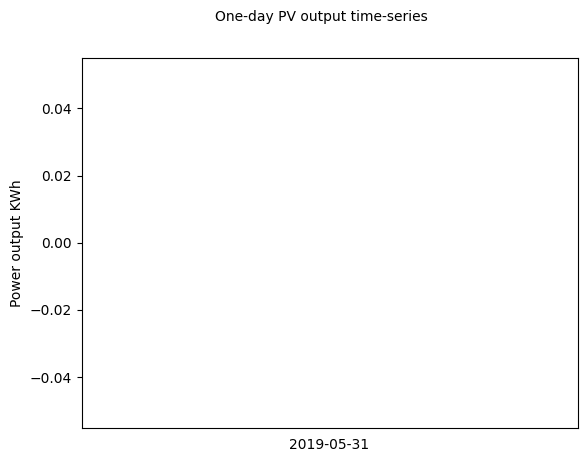

In [237]:
class xr_df():
    def __init__(self):
        """"""
        pass
    
    def random_choice(self)->None:
        """
        Randomly selects an SSID and date from xarray dataset
        """
        self.dates_lst = dataops.pv_power.coords["datetime"].values
        self.dates_lst = [pd.to_datetime(str(i))for i in self.dates_lst]
        self.dates_lst = [i.strftime('%Y-%m-%d') for i in self.dates_lst]

        self.ssid = random.choice(list(dataops.pv_power))
        print("Randomly selected SSID is ", self.ssid)
                    
    def xr_to_df(self)-> None:
        """
        converts xarray dataset into a pandas dataframe
        """
        ssid = self.ssid
        self.date_oi = random.choice(self.dates_lst)
        print("Randomly selected date is", self.date_oi)
        self.date_1 = datetime.strptime(self.date_oi, '%Y-%m-%d')
        self.next_day = self.date_1+timedelta(days=1)
        self.on_pv_system = dataops.pv_power[ssid].to_dataframe()
        self.on_pv_system = self.on_pv_system[(self.on_pv_system.index < self.next_day)&(self.on_pv_system.index > self.date_1)]
        print(self.on_pv_system)
    
    def display(self):
        """
        Plot the PV output of the day that is randomly selected with SSID and a date
        """
        fig = plt.figure()
        plt.plot(self.on_pv_system)
        fig.suptitle("One-day PV output time-series", fontsize = 10)
        plt.ylabel('Power output KWh', fontsize = 10)
        plt.xlabel(self.date_oi, fontsize = 10)
        plt.xticks([])

if __name__=="__main__":
    xrdf = xr_df()
    xrdf.random_choice()
    xrdf.xr_to_df()
    xrdf.display()
